In [2]:
import numpy as np
import pandas as pd
import requests
import json
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.figure_factory as ff
import dash

from dash import dcc, html
from dash.dependencies import Input, Output

In [4]:
gunsbystate = pd.read_csv('firearm_data_cleaned_new.txt')
gunsbystate

,year,state,rate,deaths,state_name,law_strength_score,restrictive_laws,permissive_laws,total_law_changes,unique_law_classes,...,strength_child_access_laws,strength_gun_trafficking,strength_open_carry,strength_required_reporting_of_lost_or_stolen_firearms,strength_safety_training_required,strength_untraceable_firearms,strength_permit_to_purchase,strength_firearms_in_k_12_educational_settings,rate_change,law_strength_change
0,2014,AK,19.2,145,Alaska,11,18,7,25,9,...,0,0,0,0,0,0,0,0,NaN,NaN
1,2015,AK,23.4,177,Alaska,11,18,7,25,9,...,0,0,0,0,0,0,0,0,4.2,0.0
2,2016,AK,23.3,177,Alaska,11,18,7,25,9,...,0,0,0,0,0,0,0,0,-0.1,0.0
3,2017,AK,24.5,180,Alaska,11,18,7,25,9,...,0,0,0,0,0,0,0,0,1.2,0.0
4,2018,AK,21.0,155,Alaska,11,18,7,25,9,...,0,0,0,0,0,0,0,0,-3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2019,WY,22.3,133,Wyoming,8,16,8,24,10,...,0,0,0,0,0,0,0,-1,0.8,-1.0
498,2020,WY,25.9,154,Wyoming,8,16,8,24,10,...,0,0,0,0,0,0,0,-1,3.6,0.0
499,2021,WY,26.1,155,Wyoming,8,16,8,24,10,...,0,0,0,0,0,0,0,-1,0.2,0.0
500,2022,WY,20.4,124,Wyoming,8,16,8,24,10,...,0,0,0,0,0,0,0,-1,-5.7,0.0


In [ ]:
# How have gun laws and death rates changed over time?
# most meaningful derived measures - Law intensity relative to deaths
gunsbystate['law_strength_per_death_rate'] = (gunsbystate['law_strength_score'] / gunsbystate['rate']) 
vacounties = vacounties.apply(lambda x: x.round(2) if x.dtype == 'float64' else x)
vacounties['city'] = vacounties['FIPS'] > 51500
vacounties['city'] = vacounties['city'].replace({True: 'city', False: 'county'})

In [ ]:
gun["law_strength_per_death_rate"] = (
    gun["law_strength_score"] / gun["rate"]
)

In [ ]:
# Year-to-year change
gun["law_strength_change"] = gun.groupby("state")["law_strength_score"].diff()
gun["death_rate_change"] = gun.groupby("state")["rate"].diff()

In [ ]:
# Structural classification
gun["law_regime"] = pd.qcut(
    gun["law_strength_score"],
    q=3,
    labels=["Weak Laws", "Moderate Laws", "Strong Laws"]
)

In [13]:
import pandas as pd

gun = pd.read_csv("firearm_data_cleaned_new.txt")

# 1. Law strength relative to death rate (ratio variable)
gun["law_strength_per_death_rate"] = (
    gun["law_strength_score"] / gun["rate"]
)

# 2. Year-to-year changes
gun["law_strength_change"] = gun.groupby("state")["law_strength_score"].diff()
gun["death_rate_change"] = gun.groupby("state")["rate"].diff()

# 3. Policy regime classification (structural analog to city/county)
gun["law_regime"] = pd.qcut(
    gun["law_strength_score"],
    q=3,
    labels=["Weak Laws", "Moderate Laws", "Strong Laws"]
)

# 4. Clean presentation
gun = gun.apply(lambda x: x.round(2) if x.dtype == "float64" else x)

gun


,year,state,rate,deaths,state_name,law_strength_score,restrictive_laws,permissive_laws,total_law_changes,unique_law_classes,...,strength_required_reporting_of_lost_or_stolen_firearms,strength_safety_training_required,strength_untraceable_firearms,strength_permit_to_purchase,strength_firearms_in_k_12_educational_settings,rate_change,law_strength_change,law_strength_per_death_rate,death_rate_change,law_regime
0,2014,AK,19.2,145,Alaska,11,18,7,25,9,...,0,0,0,0,0,NaN,NaN,0.57,NaN,Weak Laws
1,2015,AK,23.4,177,Alaska,11,18,7,25,9,...,0,0,0,0,0,4.2,0.0,0.47,4.2,Weak Laws
2,2016,AK,23.3,177,Alaska,11,18,7,25,9,...,0,0,0,0,0,-0.1,0.0,0.47,-0.1,Weak Laws
3,2017,AK,24.5,180,Alaska,11,18,7,25,9,...,0,0,0,0,0,1.2,0.0,0.45,1.2,Weak Laws
4,2018,AK,21.0,155,Alaska,11,18,7,25,9,...,0,0,0,0,0,-3.5,0.0,0.52,-3.5,Weak Laws
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2019,WY,22.3,133,Wyoming,8,16,8,24,10,...,0,0,0,0,-1,0.8,-1.0,0.36,0.8,Weak Laws
498,2020,WY,25.9,154,Wyoming,8,16,8,24,10,...,0,0,0,0,-1,3.6,0.0,0.31,3.6,Weak Laws
499,2021,WY,26.1,155,Wyoming,8,16,8,24,10,...,0,0,0,0,-1,0.2,0.0,0.31,0.2,Weak Laws
500,2022,WY,20.4,124,Wyoming,8,16,8,24,10,...,0,0,0,0,-1,-5.7,0.0,0.39,-5.7,Weak Laws


In [6]:
smf.ols(
    "death_rate_change ~ law_strength_change + year",
    data=gun
).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      death_rate_change   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     6.135
Date:                Thu, 04 Dec 2025   Prob (F-statistic):            0.00235
Time:                        14:14:16   Log-Likelihood:                -829.00
No. Observations:                 451   AIC:                             1664.
Df Residuals:                     448   BIC:                             1676.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             189.6196     56.104      3.380      0.001      79.360     299.879
law_strength_change    -0.0518      0.058     -0.892      0.373      -0.166       0.062
year                   -0.0937      0.028     -3.372      0.001      -0.148      -0.039
==============================================================================
Omnibus:                       63.333   Durbin-Watson:                   2.288
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.347
Skew:                           0.484   Prob(JB):                     8.16e-67
Kurtosis:                       6.906   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/var/folders/61/c554k7vn5rqgh6fl8m5pmlqh0000gn/T/ipykernel_22117/1043132254.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Axes: xlabel='year'>

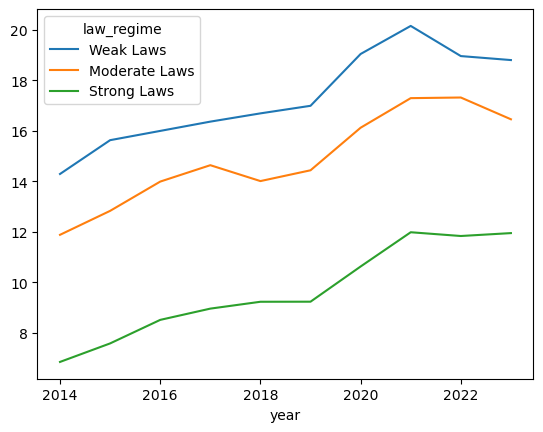

In [7]:
gun.groupby(["year", "law_regime"])["rate"].mean().unstack().plot()


In [12]:
# Laws over time
mod_laws = smf.ols("law_strength_score ~ year", data=guns_by_state).fit()
print(mod_laws.summary())

                            OLS Regression Results                            
Dep. Variable:     law_strength_score   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.076
Date:                Mon, 01 Dec 2025   Prob (F-statistic):             0.0801
Time:                        20:32:23   Log-Likelihood:                -2020.9
No. Observations:                 502   AIC:                             4046.
Df Residuals:                     500   BIC:                             4054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -724.0825    425.236     -1.703      0.0

In [15]:
# Death rates over time + law strength
mod_rate = smf.ols("rate ~ year + law_strength_score", data=guns_by_state).fit()
print(mod_rate.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     197.3
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           7.48e-64
Time:                        20:33:10   Log-Likelihood:                -1445.4
No. Observations:                 502   AIC:                             2897.
Df Residuals:                     499   BIC:                             2909.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1172.3827    135

In [14]:
# With state fixed effects
mod_rate_fe = smf.ols("rate ~ year + law_strength_score + C(state)", data=guns_by_state).fit()
print(mod_rate_fe.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     141.4
Date:                Mon, 01 Dec 2025   Prob (F-statistic):          1.56e-245
Time:                        20:33:00   Log-Likelihood:                -874.98
No. Observations:                 502   AIC:                             1856.
Df Residuals:                     449   BIC:                             2080.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [17]:
# Changes
mod_change = smf.ols("rate_change ~ law_strength_change + year", data=guns_by_state).fit()
print(mod_change.summary())

                            OLS Regression Results                            
Dep. Variable:            rate_change   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     6.135
Date:                Mon, 01 Dec 2025   Prob (F-statistic):            0.00235
Time:                        20:33:27   Log-Likelihood:                -829.00
No. Observations:                 451   AIC:                             1664.
Df Residuals:                     448   BIC:                             1676.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             189.6196    

In [ ]:
# use chloropleth to visualize law strength by state over time
# add animation_frame="year" to see changes over time
# plotly.com/python/animations/

In [ ]:
gun = pd.read_csv("firearm_data_cleaned_new.txt")

# Aggregate for multiple rows per state-year
law_map = (
    gun.groupby(["year", "state"], as_index=False)["law_strength_score"]
       .mean()
)

law_map["law_strength_score"] = law_map["law_strength_score"].round(2)


In [ ]:
# Time series gun law strength by state
fig = px.choropleth(
    gun,
    locations="state", 
    locationmode="USA-states",
    color="law_strength_score",
    animation_frame="year",
    scope="usa",
    color_continuous_scale="Viridis",
    labels={"law_strength_score": "Gun Law Strength Score"},
    title="Gun Law Strength by State Over Time (2014–2023)"
)

fig.show()


This animation represents a choropleth map of gun law strength scores by state from 2014 to 2023. This provides a visual comparison of how gun laws have evolved spatially and temporally, highlighting both policy divergence across states and changes within states over time.

In [16]:
# same thing with red/green
fig = px.choropleth(
    gun,
    locations="state",
    locationmode="USA-states",
    color="law_strength_score",
    animation_frame="year",
    scope="usa",
    color_continuous_scale="RdYlGn",
    labels={"law_strength_score": "Gun Law Strength Score"},
    title="Gun Law Strength by State Over Time"
)

fig.show()


In [ ]:
# gun law strength x death rates
fig = px.choropleth(
    gun,
    locations="state",
    locationmode="USA-states",
    color="law_strength_score",
    animation_frame="year",
    scope="usa",
    hover_name="state_name",
    hover_data={
        "rate": True,
        "deaths": True,
        "law_strength_score": True
    },
    color_continuous_scale="Viridis",
    title="Gun Law Strength by State Over Time"
)

fig.show()
